In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("C:/Users/Selin/Desktop/Örüntü/diabetes_prediction_dataset.csv")

In [53]:
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB
18


In [25]:
print(data.isna().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [7]:
print(data.duplicated())
print("Duplicate sayısı:", data.duplicated().sum())

0        False
1        False
2        False
3        False
4        False
         ...  
99995     True
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool
Duplicate sayısı: 3854


In [27]:
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [11]:
print(data.duplicated().sum())

0


8482
87664


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>,
        <Axes: title={'center': 'heart_disease'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'HbA1c_level'}>,
        <Axes: title={'center': 'blood_glucose_level'}>],
       [<Axes: title={'center': 'diabetes'}>, <Axes: >, <Axes: >]],
      dtype=object)

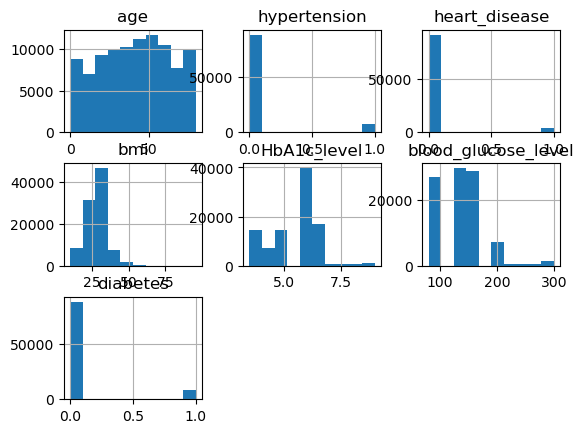

In [55]:
print(sum(data['diabetes'] == 1))
print(sum(data['diabetes'] == 0))
data.hist()

In [15]:
from sklearn.utils import resample

data_class_0 = data[data['diabetes'] == 0]
data_class_1 = data[data['diabetes'] == 1]

# 0 sınıfını 9100 örneğe kadar kırpalım
data_class_0_downsampled = resample(data_class_0, 
                                  replace=False,    
                                  n_samples=9100,    
                                  random_state=42) 

# Yeni dengelenmiş veri setini oluşturuyoruz
new_data = pd.concat([data_class_0_downsampled, data_class_1])

# Veriyi karıştıralım
new_data = new_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Dengelenmiş veri setini kontrol edelim
print(new_data['diabetes'].value_counts())

diabetes
0    9100
1    8482
Name: count, dtype: int64


In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
new_data['gender'] = le.fit_transform(new_data['gender'])
new_data['smoking_history'] = le.fit_transform(new_data['smoking_history'])


In [19]:
new_data.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,69.0,0,0,3,30.44,6.6,159,1
1,0,67.0,0,0,0,28.66,4.8,145,0
2,0,73.0,0,0,3,27.32,6.2,130,0
3,0,54.0,0,0,4,23.85,6.1,126,0
4,1,70.0,0,0,3,27.97,6.0,140,1
5,0,35.0,0,0,5,36.03,5.7,220,1
6,0,45.0,0,0,4,27.32,6.0,80,0
7,1,34.0,0,0,4,29.80,6.5,158,0
8,0,18.0,0,0,4,17.11,6.6,140,0
9,1,52.0,1,0,3,28.59,8.8,140,1


array([[<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'smoking_history'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'HbA1c_level'}>,
        <Axes: title={'center': 'blood_glucose_level'}>,
        <Axes: title={'center': 'diabetes'}>]], dtype=object)

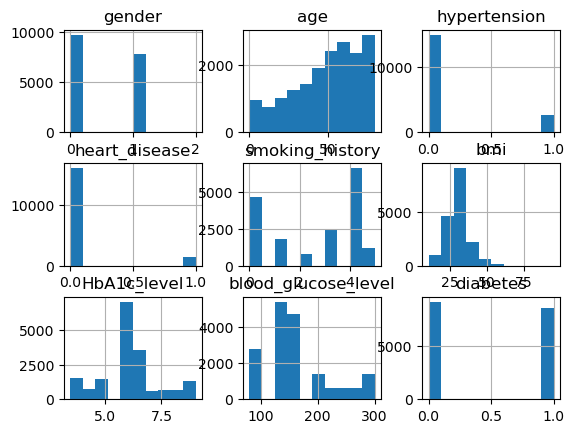

In [21]:
new_data.hist()

In [23]:
new_data.to_csv("C:/Users/Selin/Desktop/Örüntü/diabetes_new.csv", index = False)